# Import Libraries

In [1]:
# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# models
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

# evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# embeddings
from gensim.models.word2vec import Word2Vec 

# others
import nltk
import re 
import pandas as pd
import numpy as np
import pickle as pk
import struct
import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [2]:
training = pd.read_csv('train.csv', encoding="utf-8").iloc[:,-2:]
training.head()

,text,Sentiment
0,I've been here many many times and have never ...,positive
1,"I was actually really impressed, even though I...",positive
2,Excellent. Can't say enough about the sampler...,positive
3,"This was my first time here, a fellow yelper r...",positive
4,I went to BJ's when I lived in California. Th...,positive


In [3]:
testing  = pd.read_csv('test.csv', encoding="utf-8").iloc[:,-2:]
testing.head()

,text,Sentiment
0,"This place = Failtown, USA.\n\n\n\nMy friends ...",negative
1,"Yes, as someone stated before, this place make...",negative
2,Ahhh the infamous Heart Attack Grill. \n\nList...,negative
3,One of the WORST experiences of my life. My f...,negative
4,I saw the Heart Attack Grill on television and...,negative


# Lowercase Text

In [4]:
training['text'] = training['text'].apply(lambda x:x.lower())
testing['text'] = testing['text'].apply(lambda x:x.lower())

# Label Encoding
Positive to 1,Negative to -1 

In [5]:
map = {'positive':1, 'negative':-1}

training['Sentiment'] = training['Sentiment'].replace(map)
testing['Sentiment'] = testing['Sentiment'].replace(map)

In [6]:
training.head()

,text,Sentiment
0,i've been here many many times and have never ...,1
1,"i was actually really impressed, even though i...",1
2,excellent. can't say enough about the sampler...,1
3,"this was my first time here, a fellow yelper r...",1
4,i went to bj's when i lived in california. th...,1


In [7]:
testing.head()

,text,Sentiment
0,"this place = failtown, usa.\n\n\n\nmy friends ...",-1
1,"yes, as someone stated before, this place make...",-1
2,ahhh the infamous heart attack grill. \n\nlist...,-1
3,one of the worst experiences of my life. my f...,-1
4,i saw the heart attack grill on television and...,-1


# Train-test split

In [8]:
X_train = training.iloc[:,0]
y_train = training.iloc[:,1]

X_test = testing.iloc[:,0]
y_test = testing.iloc[:,1]

# Functions

In [9]:
def modeling(vectorizer,X_train,y_train):
  names = ['Max Entropy/Logistic Regression model',
           'KNN model',
           'SVM model']

  models = [
            Pipeline([("vectorizer", vectorizer), ("LR",LogisticRegression(random_state=0, solver='lbfgs'))]),
            Pipeline([("vectorizer",vectorizer), ("KNN",KNeighborsClassifier(n_neighbors = 3, weights = 'distance', metric = 'cosine', algorithm = 'brute'))]),
            Pipeline([("vectorizer",vectorizer ), ("SVM",LinearSVC(C=100))])
            ]

  for model,name in zip(models,names):
    print(name)
    print('-'*30)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('*'*100)

In [10]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        if len(word2vec)>0:
            self.dim=len(word2vec[next(iter(glove_small))])
        else:
            self.dim=0
            
    def fit(self, X,y):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

# Create Word to Vector dictionary using Glove

In [11]:
GLOVE_6B_100D_PATH = '/content/drive/MyDrive/glove.6B.100d.txt'

In [12]:
encoding="utf-8"
glove = {}
with open(GLOVE_6B_100D_PATH, "rb") as infile:
  for line in infile:
    parts = line.split()
    word = parts[0].decode(encoding)
    nums=np.array(parts[1:], dtype=np.float32)
    glove[word] = nums

In [13]:
glove['feel']

array([-4.2895e-02,  7.0671e-01,  7.5316e-01, -5.9963e-01, -8.0169e-01,
        6.0094e-01, -6.7419e-01,  2.3592e-01,  2.4005e-01, -3.6372e-01,
       -2.2720e-01,  3.6026e-02,  4.6591e-01, -3.6233e-01, -3.1325e-01,
       -3.6757e-01, -5.7255e-01,  3.0661e-01, -4.8606e-01,  6.3214e-01,
        2.8931e-01,  6.0741e-01, -8.6788e-03, -6.8206e-01, -1.8410e-01,
        2.4847e-01,  9.5902e-02, -6.9108e-01,  9.0869e-01, -3.9224e-01,
        1.4345e-01,  7.8112e-01, -1.1601e-01,  6.0312e-02,  4.6300e-01,
       -4.4191e-02,  1.4284e-01,  6.2234e-01,  2.3943e-01, -4.6815e-01,
       -2.2553e-01, -3.1920e-01,  3.1397e-01, -4.2308e-01, -4.0827e-01,
       -2.4659e-01,  5.1572e-01,  3.5494e-01,  3.1545e-01, -1.4043e+00,
       -1.6486e-01, -5.5508e-02,  1.0260e-01,  6.1515e-01,  1.2691e-01,
       -2.2379e+00,  6.9510e-01,  1.2609e-01,  1.0901e+00,  2.5953e-01,
        2.2974e-01,  1.1125e+00, -1.0156e+00, -4.1881e-01,  3.8853e-01,
       -4.8856e-02,  9.1775e-01,  1.9732e-03, -6.9162e-01, -5.89

In [14]:
print(len(glove))

400000


Create Smaller Word to Vector dictionary

In [15]:
X = list(X_train)+list(X_test)
X = [i.split() for i in X]
all_words = set([item for sublist in X for item in sublist])

print(len(list(all_words)))

95586


In [16]:
glove_small = {}
with open(GLOVE_6B_100D_PATH, "rb") as infile:
  for line in infile:
    parts = line.split()
    word = parts[0].decode(encoding)
    if (word in all_words):
      nums=np.array(parts[1:], dtype=np.float32)
      glove_small[word] = nums

In [17]:
print(len(glove_small))

25804


In [18]:
vectorizer1 = MeanEmbeddingVectorizer(glove_small)
modeling(vectorizer1,X_train,y_train)

Max Entropy/Logistic Regression model
------------------------------
[[1492  305]
 [1038  962]]
              precision    recall  f1-score   support

          -1       0.59      0.83      0.69      1797
           1       0.76      0.48      0.59      2000

    accuracy                           0.65      3797
   macro avg       0.67      0.66      0.64      3797
weighted avg       0.68      0.65      0.64      3797

****************************************************************************************************
KNN model
------------------------------
[[1204  593]
 [ 806 1194]]
              precision    recall  f1-score   support

          -1       0.60      0.67      0.63      1797
           1       0.67      0.60      0.63      2000

    accuracy                           0.63      3797
   macro avg       0.63      0.63      0.63      3797
weighted avg       0.64      0.63      0.63      3797

*********************************************************************************

# Custom Word2Vec embeddings

In [19]:
model = Word2Vec(X, size=100, window=5, min_count=2, workers=2)
w2v = {w: vec for w, vec in zip(model.wv.index2word, model.wv.syn0)}

In [20]:
print(len(w2v))

41892


In [21]:
w2v['hash']

array([ 2.1810286e-01, -4.2338952e-01,  1.1922845e-01,  4.3781570e-01,
       -1.0294294e+00, -1.9843459e+00,  9.1950320e-02, -4.7009540e-01,
        5.0429773e-01, -2.1811996e-01,  2.9978237e-01,  4.7604352e-01,
       -4.7936612e-01, -6.3335083e-02,  2.0788278e-01,  1.3412334e-01,
        1.1814268e-02,  6.6635972e-01,  3.8056520e-01,  1.5901063e-02,
        4.4774124e-01, -3.5930613e-01, -1.2763381e+00, -3.9287828e-02,
        3.4656867e-01, -1.8739043e+00, -5.0062895e-01,  3.9708126e-01,
        6.9141388e-01,  4.3232524e-01, -2.2058699e-01, -4.5003691e-01,
       -5.5519789e-01,  1.8154200e+00,  2.6911110e-01, -2.4108827e-04,
        2.9143986e-01, -6.0309285e-01,  8.9620554e-01, -9.2829263e-01,
        1.1838235e+00, -2.3746103e-01,  1.1494856e+00, -5.6245661e-01,
       -4.9866426e-01, -5.5814618e-01,  5.8655357e-01,  1.3115320e-01,
       -3.8981754e-01, -1.8178450e-01,  6.8551445e-01, -1.4277525e+00,
        3.1813869e-01, -1.4764047e+00,  1.0634351e+00, -7.3247755e-01,
      

In [22]:
vectorizer2 = MeanEmbeddingVectorizer(w2v)
modeling(vectorizer2,X_train,y_train)

Max Entropy/Logistic Regression model
------------------------------
[[1493  304]
 [1109  891]]
              precision    recall  f1-score   support

          -1       0.57      0.83      0.68      1797
           1       0.75      0.45      0.56      2000

    accuracy                           0.63      3797
   macro avg       0.66      0.64      0.62      3797
weighted avg       0.66      0.63      0.62      3797

****************************************************************************************************
KNN model
------------------------------
[[1159  638]
 [ 792 1208]]
              precision    recall  f1-score   support

          -1       0.59      0.64      0.62      1797
           1       0.65      0.60      0.63      2000

    accuracy                           0.62      3797
   macro avg       0.62      0.62      0.62      3797
weighted avg       0.63      0.62      0.62      3797

*********************************************************************************

# TFIDF Embeddings

In [23]:
vectorizer3 = TfidfVectorizer(analyzer=lambda x: x)
modeling(vectorizer3,X_train,y_train)

Max Entropy/Logistic Regression model
------------------------------
[[1624  173]
 [1291  709]]
              precision    recall  f1-score   support

          -1       0.56      0.90      0.69      1797
           1       0.80      0.35      0.49      2000

    accuracy                           0.61      3797
   macro avg       0.68      0.63      0.59      3797
weighted avg       0.69      0.61      0.59      3797

****************************************************************************************************
KNN model
------------------------------
[[1451  346]
 [ 999 1001]]
              precision    recall  f1-score   support

          -1       0.59      0.81      0.68      1797
           1       0.74      0.50      0.60      2000

    accuracy                           0.65      3797
   macro avg       0.67      0.65      0.64      3797
weighted avg       0.67      0.65      0.64      3797

*********************************************************************************

# How the ranking depends on the amount of training data

In [24]:
data = pd.concat([training,testing])
X = data.iloc[:,0].reset_index(drop=True)
y = data.iloc[:,1].reset_index(drop=True)

In [25]:
lr_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("LR",LogisticRegression(random_state=0, solver='lbfgs'))])
lr_w2v = Pipeline([("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)), ("LR",LogisticRegression(random_state=0, solver='lbfgs'))])
lr_glove_small = Pipeline([("glove vectorizer", MeanEmbeddingVectorizer(glove_small)), ("LR",LogisticRegression(random_state=0, solver='lbfgs'))])

In [26]:
all_models = [
    ("lr_tfidf", lr_tfidf),
    ("lr_w2v", lr_w2v),
    ("lr_glove_small",lr_glove_small)
]

In [27]:
def call(model,train_size):
  sss=StratifiedShuffleSplit(n_splits = 5, 
                             train_size = train_size, 
                             test_size = len(y)-train_size)
  
  scores=[]
  for train, test in sss.split(X, y):
    X_train = X[train]
    y_train = y[train]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores.append(accuracy_score(y_pred, y_test))
      
  return np.mean(scores)

In [28]:
train_sizes = [1000,5000,10000,15000,17900]
table=[]
for name, model in all_models:
    for n in train_sizes:
        table.append({'model': name, 
                      'accuracy': call(model,n), 
                      'train_size': n})
df = pd.DataFrame(table)

In [29]:
df

,model,accuracy,train_size
0,lr_tfidf,0.589887,1000
1,lr_tfidf,0.651409,5000
2,lr_tfidf,0.663313,10000
3,lr_tfidf,0.665841,15000
4,lr_tfidf,0.665473,17900
5,lr_w2v,0.570450,1000
6,lr_w2v,0.611535,5000
7,lr_w2v,0.629076,10000
8,lr_w2v,0.642402,15000
9,lr_w2v,0.647248,17900


[Text(0, 0.5, 'accuracy')]

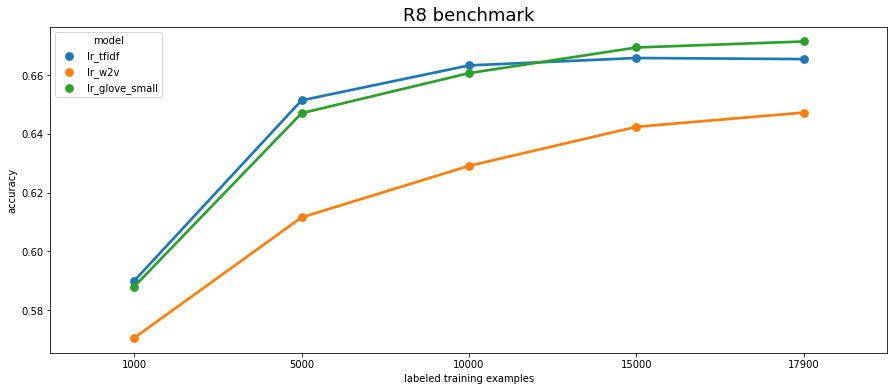

In [31]:
plt.figure(figsize=(15, 6))
fig = sns.pointplot(x='train_size', y='accuracy', hue='model', 
                    data=df[df.model.map(lambda x: x in ["lr_tfidf", "lr_w2v", "lr_glove_small"])])
sns.set_context("notebook", font_scale=1.5)
fig.set(ylabel="accuracy")
fig.set(xlabel="labeled training examples")
fig.set(title="R8 benchmark")
fig.set(ylabel="accuracy")